In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy
import json
from config import weather_api_key
import time
from scipy.stats import linregress
from config import g_key
import gmaps


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | te anau
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | sehithwa
Processing Record 5 of Set 1 | vastervik
City not found. Skipping...
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | svetlaya
Processing Record 18 of Set 1 | loandjili
Processing Record 19 of Set 1 | muros
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of S

Processing Record 36 of Set 4 | puerto morazan
Processing Record 37 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 4 | isangel
Processing Record 39 of Set 4 | domoni
Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 42 of Set 4 | omsukchan
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | moletai
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | kalmunai
Processing Record 48 of Set 4 | tikrit
Processing Record 49 of Set 4 | bekhteyevka
Processing Record 50 of Set 4 | alvand
Processing Record 1 of Set 5 | asfi
Processing Record 2 of Set 5 | bhojudih
Processing Record 3 of Set 5 | dhidhdhoo
Processing Record 4 of Set 5 | asau
Processing Record 5 of Set 5 | muyezerskiy
Processing Record 6 of Set 5 | dunedin
Processing Record 7 of Set 5 | hervey bay
Processing Record 8 of Set 5 | kiunga
Processing Rec

Processing Record 25 of Set 8 | manakara
Processing Record 26 of Set 8 | turukhansk
Processing Record 27 of Set 8 | luderitz
Processing Record 28 of Set 8 | pangoa
Processing Record 29 of Set 8 | warah
Processing Record 30 of Set 8 | grindavik
Processing Record 31 of Set 8 | the valley
Processing Record 32 of Set 8 | poya
Processing Record 33 of Set 8 | saquena
Processing Record 34 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 35 of Set 8 | hofn
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | marawi
Processing Record 38 of Set 8 | reconquista
Processing Record 39 of Set 8 | hami
Processing Record 40 of Set 8 | naryan-mar
Processing Record 41 of Set 8 | iqaluit
Processing Record 42 of Set 8 | brigantine
Processing Record 43 of Set 8 | cherskiy
Processing Record 44 of Set 8 | todos santos
Processing Record 45 of Set 8 | bafia
Processing Record 46 of Set 8 | lincoln
Processing Record 47 of Set 8 | rantauprapat
Processing Record 48 of Set 8 | burayd

Processing Record 13 of Set 12 | ituni
City not found. Skipping...
Processing Record 14 of Set 12 | san rafael
Processing Record 15 of Set 12 | tornio
Processing Record 16 of Set 12 | gurgan
City not found. Skipping...
Processing Record 17 of Set 12 | kutum
Processing Record 18 of Set 12 | leibnitz
Processing Record 19 of Set 12 | borovoy
Processing Record 20 of Set 12 | vila velha
Processing Record 21 of Set 12 | ust-ilimsk
Processing Record 22 of Set 12 | lupiro
Processing Record 23 of Set 12 | vila franca do campo
Processing Record 24 of Set 12 | totness
Processing Record 25 of Set 12 | zhangye
Processing Record 26 of Set 12 | dalby
Processing Record 27 of Set 12 | andilamena
Processing Record 28 of Set 12 | paka
Processing Record 29 of Set 12 | north bend
Processing Record 30 of Set 12 | anloga
Processing Record 31 of Set 12 | maceio
Processing Record 32 of Set 12 | awbari
Processing Record 33 of Set 12 | bozeman
Processing Record 34 of Set 12 | ulladulla
Processing Record 35 of Se

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,37.51,65,90,17.90,RU,2021-09-29 21:37:22
1,Te Anau,-45.4167,167.7167,44.31,70,74,1.81,NZ,2021-09-29 21:38:52
2,Butaritari,3.0707,172.7902,81.64,79,98,17.20,KI,2021-09-29 21:37:17
3,Sehithwa,-20.4667,22.7167,77.34,19,5,4.59,BW,2021-09-29 21:38:52
4,Souillac,-20.5167,57.5167,71.98,83,40,10.36,MU,2021-09-29 21:37:03
...,...,...,...,...,...,...,...,...,...
555,Los Pozos,8.4518,-62.7268,93.04,61,100,5.70,VE,2021-09-29 21:41:24
556,Ust-Nera,64.5667,143.2000,20.14,67,77,5.59,RU,2021-09-29 21:41:25
557,Olinda,-8.0089,-34.8553,80.33,78,40,10.36,BR,2021-09-29 21:37:31
558,Sandovo,58.4602,36.4128,38.95,93,22,0.87,RU,2021-09-29 21:41:25


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

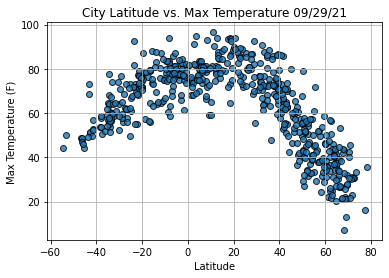

In [9]:


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

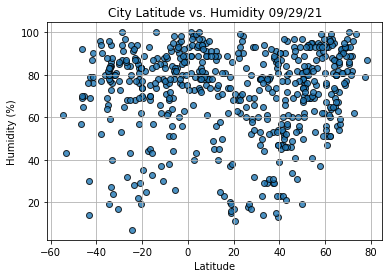

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

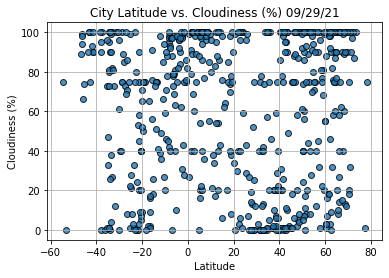

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

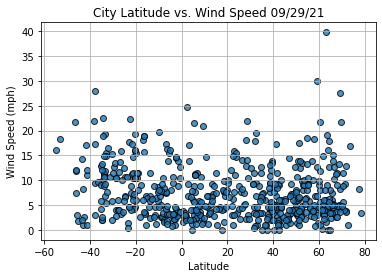

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


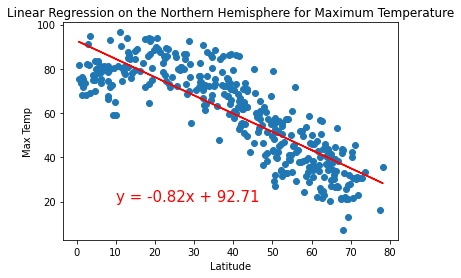

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))

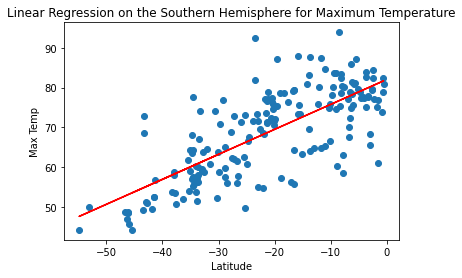

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,40))

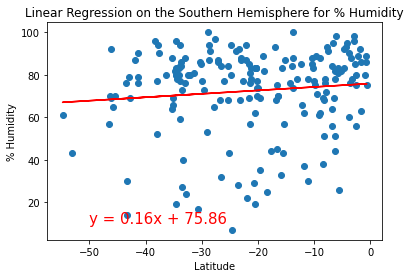

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,10))

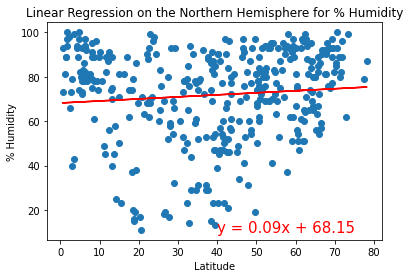

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

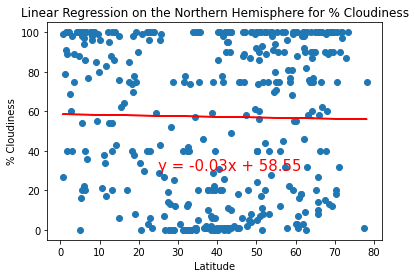

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness','% Cloudiness',(25,30))

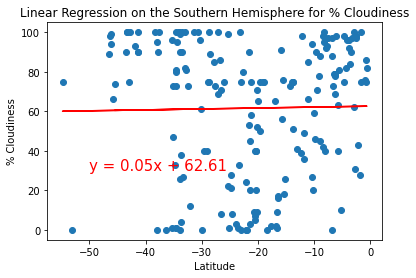

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness','% Cloudiness',(-50,30))

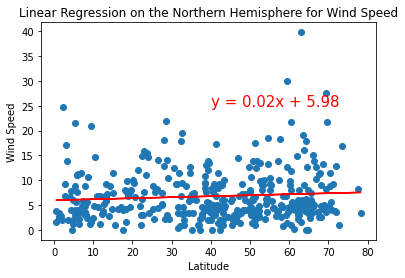

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

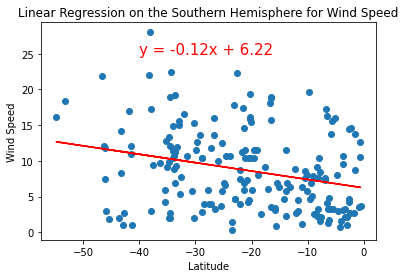

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,25))